## EE512: Machine Learning
## Homework-2
### Q5


In [56]:
from numpy import linalg as LA
import numpy as np 
from sklearn.model_selection import train_test_split  # To split data into train and test set


# for plotting graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [57]:
n_samples = 1500

X = np.random.uniform(-5,5, (2, n_samples) ).astype(np.float32)

Y = (X[0, :]**2 + X[1,:]**3 + X[0,:]*X[1,:]).astype(np.float32)

In [58]:
### Visualize Mapping from Input Feature Vector $\Large x = [x_1 ,  x_2]^T$ to target variable $\Large y$

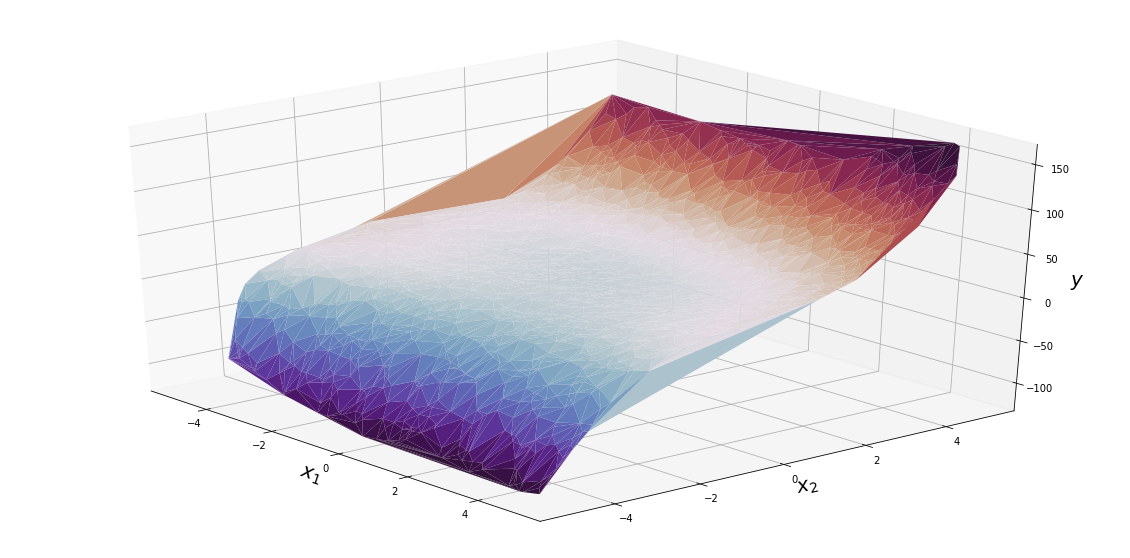

In [59]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')


ax.plot_trisurf(X[0],X[1],Y, cmap='twilight_shifted')
ax.view_init(30, -40)

ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$y$'  , fontsize=20)

plt.show()

trainX, testX, trainY, testY = train_test_split(X.T, Y, test_size=0.33, random_state=42)


trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1 )
testX  = testX.reshape(testX.shape[0], testX.shape[1], 1 )

trainY = trainY.reshape(trainY.shape[0], 1, 1 )
testY  = testY.reshape(testY.shape[0], 1 ,1)


print("Shape of Train Data:")
print("TrainX: " , trainX.shape)
print("TrainY: " , trainY.shape)



print("\nShape of Test Data:")
print("TestX: " , testX.shape)
print("TestY: " , testY.shape)

---

## NeuralNetwork with Numpy
### Feed Forward and Backpropagation

We will implement 3-layer neural network for regression. Following are the equations for feed forward through network. We are using sigmoid as activation function and mean-squared-error as loss.

$$\Large z_1  = W_1 x + b_1$$
$$\Large h_1  = \sigma(z_1)$$

<br>
<br>

$$\Large z_2  = W_2 h_1 + b_2$$
$$\Large h_2  = \sigma(z_2)$$

<br>
<br>

$$\Large \hat{y}  = W_3 h_2 + b_3$$


<br>
<br>

$$\Large loss  = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y_i})^2 $$
<center>where N is batch size</center>

In [60]:
class NeuralNetwork(object):        
    
    """
    We will implement neural network as a python class. 
    Object of this class will have a few attributes for example learnable parameters
    and functions such as forward(), backward_propagate() etc.
    
    """
    
    # Initialize attributes of object
    def __init__(self,  input_size  , hidden_size  , output_size  ):        
        
        
        self.input_size  = input_size
        self.hidden_size = hidden_size 
        self.output_size = output_size
        
        
        # Learnable weights of neural network
        self.W1 = np.random.rand( hidden_size , input_size  ) # randomly initialize W1 matrix
        self.b1 = np.random.rand( hidden_size , 1           ) # randomly initialize b1 vector
        
        
        self.W2 = np.random.rand( hidden_size , hidden_size ) # randomly initialize W2 matrix
        self.b2 = np.random.rand( hidden_size , 1           ) # randomly initialize b2 vector
        
        self.W3 = np.random.rand( output_size , hidden_size ) # randomly initialize W3 matrix
        self.b3 = np.random.rand( output_size , 1           ) # randomly initialize b3 vector
        
        
        # Non-learnable parameters of neural network. These parameters are used in back-propagation
        self.z1 = np.zeros( (hidden_size , 1) ) 
        self.h1 = np.zeros( (hidden_size , 1) ) 
        
        self.z2 = np.zeros( (hidden_size , 1) ) 
        self.h2 = np.zeros( (hidden_size , 1) ) 
        
    
    
    
    # This function just prints a few properties of object created from this class    
    def __str__(self):
        
        msg = "NeuralNetwork:\n\nSize of Input Layer = " + str(self.input_size) + "\nSize of 1st Hidden Layer  = " + str(self.hidden_size)+ "\nSize of 2nd Hidden Layer  = " + str(self.hidden_size)+ "\nSize of Output Layer  = " + str(self.output_size)
                
        return  msg
        
       
    
    
    
    
        
    # Forward propagation through neural network   
    def forward(self, x):
        
        
        self.z1  = (self.W1 @ x ) + self.b1         # @ operator is used for standard matrix-multiplication 
        
        self.h1  = self.sigmoid(self.z1)            # element-wise operation on vector
        
        self.z2  = (self.W2 @ self.h1) + self.b2
        
        self.h2  = self.sigmoid(self.z2)
        
        
        
        
        # complete forward operation
        
        
        
        
        y_hat = (self.W3 @ self.h2) + self.b3
       
        
        return y_hat 
    def backward(self , y_hat , x , y , lr):

        # Assuming, MSE (mean square error) loss has been computed
        # Using chain rule, find gradients of learnable parameters of neural network
        # Adjust weights and biases using gradients and learning rate 

        # lr = learning rate
        
        
        batch_size = y_hat.shape[0]
        
        
        # Zero-out all gradients
        grad_b3 = np.zeros((batch_size, self.b3.shape[0], self.b3.shape[1] ))
        grad_W3 = np.zeros((batch_size, self.W3.shape[0], self.W3.shape[1] ))
        
        grad_b2 = np.zeros((batch_size, self.b2.shape[0], self.b2.shape[1] ))
        grad_W2 = np.zeros((batch_size, self.W2.shape[0], self.W2.shape[1] ))
        
        grad_b1 = np.zeros((batch_size, self.b1.shape[0], self.b1.shape[1] ))
        grad_W1 = np.zeros((batch_size, self.W1.shape[0], self.W1.shape[1] ))
        
        
        
        
        # Complete back propagation ...
        delta_1=-2*(y-y_hat).transpose((0,2,1))
        
        grad_b3=delta_1.transpose((0,2,1))
        grad_W3=delta_1.transpose((0,2,1))@self.h2.transpose((0,2,1))
        c=0
        d=np.zeros((batch_size,self.hidden_size,self.hidden_size))
       
        ## to convert deriivative matrix into diagonal matrix
        while c <  batch_size:
            a=self.sigmoid_der(self.z2[c,:,:])
            a=np.diagflat(a)
            d[c,:,:]=a
            del(a)
            c=c+1

        delta_2=delta_1 @ self.W3@d
        
        
        
        grad_b2=delta_2.transpose((0,2,1))
        grad_W2=delta_2.transpose((0,2,1)) @ self.h1.transpose((0,2,1))
#         ## to convert deriivative matrix into diagonal matrix
        
        c=0
        d1=np.zeros((batch_size,self.hidden_size,self.hidden_size))
        while c <  batch_size:
            a=self.sigmoid_der(self.z1[c,:,:])
            a=np.diagflat(a)
            d1[c,:,:]=a
            del(a)
            c=c+1
        
        delta_3= delta_2 @ self.W2 @ d1
        grad_b1= delta_3.transpose((0,2,1))
        grad_W1=delta_3.transpose((0,2,1)) @ x.transpose((0,2,1))
        
        
#         # Record gradients for all examples in given batch
        
            
            
        # Take average along batch dimension
           
        
        grad_b3 = np.mean(grad_b3, axis=0)
        grad_W3 = np.mean(grad_W3, axis=0)
        grad_b2 = np.mean(grad_b2, axis=0)
        grad_W2 = np.mean(grad_W2, axis=0)
        
        grad_b1 = np.mean(grad_b1, axis=0)
        grad_W1 = np.mean(grad_W1, axis=0)
        
        
        # Gradient Descent
        # Update weights and biases using gradients
        
        self.W3 = self.W3 - lr*grad_W3
        self.b3 = self.b3 - lr*grad_b3
        
        self.W2 = self.W2 - lr*grad_W2
        self.b2 = self.b2 - lr*grad_b2
        
        self.W1 = self.W1 - lr*grad_W1
        self.b1 = self.b1 - lr*grad_b1

        

      
    
    
    
    def sigmoid(self, x):
        # Activation Function
                
        sig_x = np.zeros(x.shape)
        
        # protection from overflow and underflow
        low_x = -30
        up_x  = 30
        
        sig_x[x< low_x]=0
        sig_x[x> up_x ]=1
        
        safe_x = x[(x>= low_x) & (x<= up_x)]
        sig_x[(x>= low_x) & (x<= up_x)] = np.exp(safe_x)/(1+np.exp(safe_x))
        
                
        return sig_x
    
    def sigmoid_der(self,x):
        s= self.sigmoid(x)
        return s*(1-s)
    def mse_loss(self, y, y_hat):
        # Mean Square Error Loss
        
        loss  =  ((y-y_hat)**2).mean(axis=0)
        
        return loss

### Creating a Randomly Initialized Neural Network

In [61]:
MyNeuralNet = NeuralNetwork( input_size = 2 , hidden_size = 4 , output_size = 1 )


print(MyNeuralNet)

NeuralNetwork:

Size of Input Layer = 2
Size of 1st Hidden Layer  = 4
Size of 2nd Hidden Layer  = 4
Size of Output Layer  = 1


### Printing Randomly Initialized Weight Matrix and Bias Vector

In [62]:
print("Weight Matrix of 1st Hidden Layer:\n\nW1 = \n", MyNeuralNet.W1)
print("\n\nBias Vector of 1st Hidden Layer:\n\nb1 = \n", MyNeuralNet.b1)

print("\n\nNote:  You can easily view other learnable weight matrices and bias vectors of neural network using .dot notation.")

Weight Matrix of 1st Hidden Layer:

W1 = 
 [[0.32403613 0.68712501]
 [0.05587522 0.21770501]
 [0.91408174 0.38982134]
 [0.87671439 0.04484669]]


Bias Vector of 1st Hidden Layer:

b1 = 
 [[0.93455488]
 [0.38916682]
 [0.16502054]
 [0.20288252]]


Note:  You can easily view other learnable weight matrices and bias vectors of neural network using .dot notation.


In [63]:
x = trainX[:10]
y = trainY[:10]

lr = 0.1


y_hat = MyNeuralNet.forward( x )
print("W1 matrix before weight update:")
print("\nW1 = \n", MyNeuralNet.W1)
MyNeuralNet.backward( y_hat , x , y , lr)
print("\n\nW1 matrix after weight update:")
print("\nW1 = \n", MyNeuralNet.W1)


W1 matrix before weight update:

W1 = 
 [[0.32403613 0.68712501]
 [0.05587522 0.21770501]
 [0.91408174 0.38982134]
 [0.87671439 0.04484669]]


W1 matrix after weight update:

W1 = 
 [[0.32080265 1.04381402]
 [0.26677754 1.64441799]
 [0.96806185 0.80955676]
 [1.10174456 1.21036394]]


## Train Neural Network

In [64]:
x = trainX[:10]
y = trainY[:10]

lr = 0.1


y_hat = MyNeuralNet.forward( x )
print("W1 matrix before weight update:")
print("\nW1 = \n", MyNeuralNet.W1)
MyNeuralNet.backward( y_hat , x , y , lr)
print("\n\nW1 matrix after weight update:")
print("\nW1 = \n", MyNeuralNet.W1)


W1 matrix before weight update:

W1 = 
 [[0.32080265 1.04381402]
 [0.26677754 1.64441799]
 [0.96806185 0.80955676]
 [1.10174456 1.21036394]]


W1 matrix after weight update:

W1 = 
 [[0.20693154 1.32786306]
 [0.20441402 1.67140252]
 [0.92786701 1.06215404]
 [1.05246978 1.27017443]]


In [65]:
MyNeuralNet = NeuralNetwork( input_size = 2 , hidden_size = 16 , output_size = 1 )


print(MyNeuralNet)

lr = 0.001

n_epochs = 1000

n_examples = trainX.shape[0]

batch_size =25

n_batches = n_examples//batch_size

epoch_loss = []


print("\n\nTraining...")
for epoch in range(n_epochs):
    
    loss=0
    
    for i in range(n_batches):
        
        x = trainX[(i*batch_size):(i*batch_size+batch_size)]
        y = trainY[(i*batch_size):(i*batch_size+batch_size)]
        
        # Forward Pass
        y_hat = MyNeuralNet.forward( x )
        
        loss = loss+MyNeuralNet.mse_loss(y,y_hat)
        
        # Backpropagation
        MyNeuralNet.backward( y_hat , x , y , lr)
        
    epoch_loss.append(loss.squeeze()/n_batches)    
    print("Epoch = %3d   Loss = %3.3f"%(epoch, epoch_loss[epoch]) )
    
print("\nDone.")    

NeuralNetwork:

Size of Input Layer = 2
Size of 1st Hidden Layer  = 16
Size of 2nd Hidden Layer  = 16
Size of Output Layer  = 1


Training...
Epoch =   0   Loss = 2247.813
Epoch =   1   Loss = 2230.610
Epoch =   2   Loss = 2194.603
Epoch =   3   Loss = 2126.689
Epoch =   4   Loss = 2046.517
Epoch =   5   Loss = 1957.480
Epoch =   6   Loss = 1863.568
Epoch =   7   Loss = 1772.372
Epoch =   8   Loss = 1688.036
Epoch =   9   Loss = 1611.007
Epoch =  10   Loss = 1539.573
Epoch =  11   Loss = 1470.817
Epoch =  12   Loss = 1401.778
Epoch =  13   Loss = 1333.524
Epoch =  14   Loss = 1269.547
Epoch =  15   Loss = 1210.369
Epoch =  16   Loss = 1155.708
Epoch =  17   Loss = 1105.355
Epoch =  18   Loss = 1059.167
Epoch =  19   Loss = 1016.649
Epoch =  20   Loss = 977.075
Epoch =  21   Loss = 939.782
Epoch =  22   Loss = 904.012
Epoch =  23   Loss = 868.929
Epoch =  24   Loss = 834.200
Epoch =  25   Loss = 799.771
Epoch =  26   Loss = 765.630
Epoch =  27   Loss = 731.906
Epoch =  28   Loss = 698.8

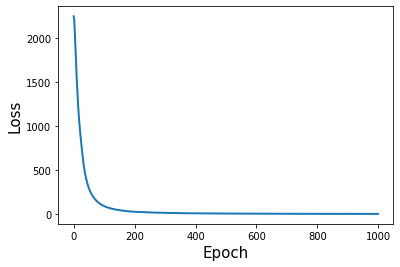

In [66]:
plt.plot(epoch_loss, linewidth=2)
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.show()

## Prediction

In [67]:
y_pred = MyNeuralNet.forward(testX)

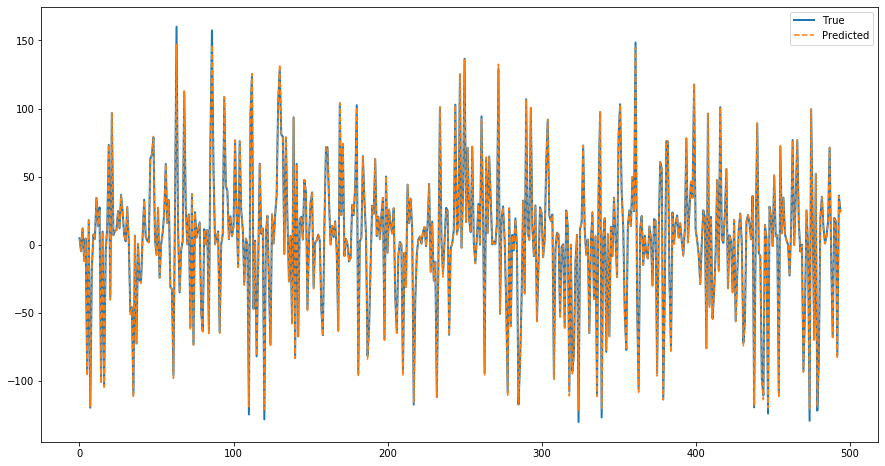

In [68]:
plt.figure(figsize=(15,8))
plt.plot(testY.squeeze(), linewidth=2 , label="True")
plt.plot(y_pred.squeeze(), linestyle="--",  label="Predicted")
plt.legend()
plt.show()

# L2 NORM

In [69]:
LA.norm(y_pred-testY)

30.085965075871833